<a href="https://colab.research.google.com/github/SahilR02/ADS-Experiments/blob/main/ADS%20Experiment%205/ADS_Exp5_SahilR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ADS Experiment No.5**

**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Housing_data.csv')
data

,City,County,Year,TOTALproduction,SFproduction,Mfproduction,Mhproduction
0,Alameda,Alameda County,1990,295,178,96,21
1,Alameda,Alameda County,1991,360,179,153,28
2,Alameda,Alameda County,1992,59,138,-107,28
3,Alameda,Alameda County,1993,36,122,-114,28
4,Alameda,Alameda County,1994,3,105,-130,28
...,...,...,...,...,...,...,...
3032,Windsor,Sonoma County,2013,22,12,10,0
3033,Windsor,Sonoma County,2014,2,2,0,0
3034,Windsor,Sonoma County,2015,8,8,0,0
3035,Windsor,Sonoma County,2016,18,19,0,-1


In [ ]:
# DataFrame info
print("\nDataFrame info:")
print(data.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037 entries, 0 to 3036
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             3037 non-null   object
 1   County           3037 non-null   object
 2   Year             3037 non-null   int64 
 3   TOTALproduction  3037 non-null   int64 
 4   SFproduction     3037 non-null   int64 
 5   Mfproduction     3037 non-null   int64 
 6   Mhproduction     3037 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 166.2+ KB
None


In [ ]:
#count no of county
count_county=pd.value_counts(data['County'],sort=True)
count_county

San Mateo County        588
Contra Costa County     550
Santa Clara County      448
Alameda County          420
Marin County            336
Sonoma County           277
Solano County           224
Napa County             166
San Francisco County     28
Name: County, dtype: int64

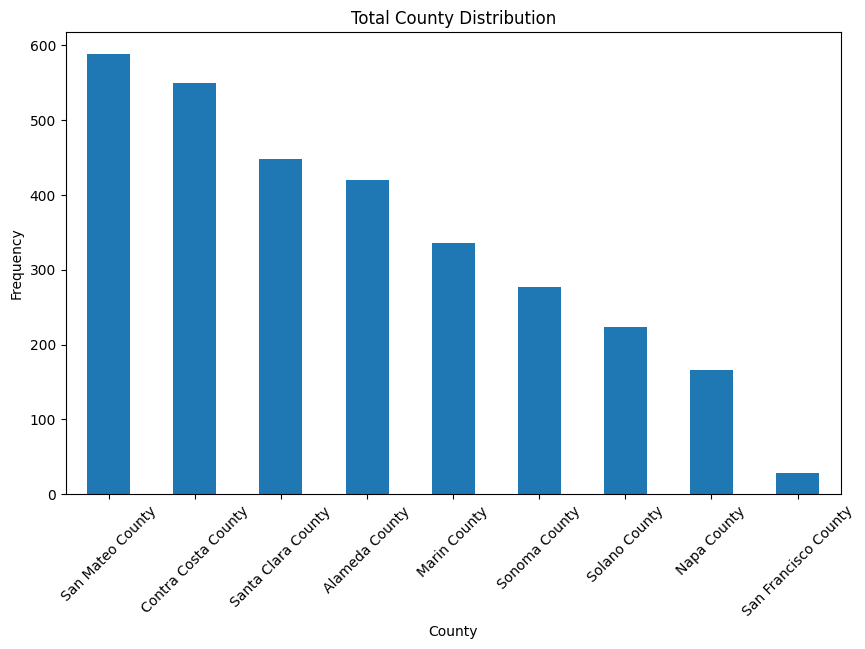

In [ ]:
# Plot the different county counts
plt.figure(figsize=(10, 6))
count_county.plot(kind='bar', rot=45)
plt.title("Total County Distribution")
plt.xlabel("County")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#separate different County
san_mateo=data[data['County']=="San Mateo County "]
contra_costa=data[data['County']=="Contra Costa County "]
santa_clara=data[data['County']=="Santa Clara County"]
alameda=data[data['County']=="Alameda County"]
marin=data[data['County']=="Marin County"]
sonoma=data[data['County']=="Sonoma County"]
solanor=data[data['County']=="Solano County"]
napa=data[data['County']=="Napa County"]
san_francisco=data[data['County']=="San Francisco County"]

In [ ]:
#features and target
features=data.drop(['County'],axis='columns')
target=data["County"]

**SMOTE**

In [ ]:
#use SMOTE to balance
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
features_encoded = encoder.fit_transform(features)
from imblearn.combine import SMOTETomek
smtk=SMOTETomek()
x_res,y_res=smtk.fit_resample(features_encoded,target)
x_res.shape

(5216, 2099)

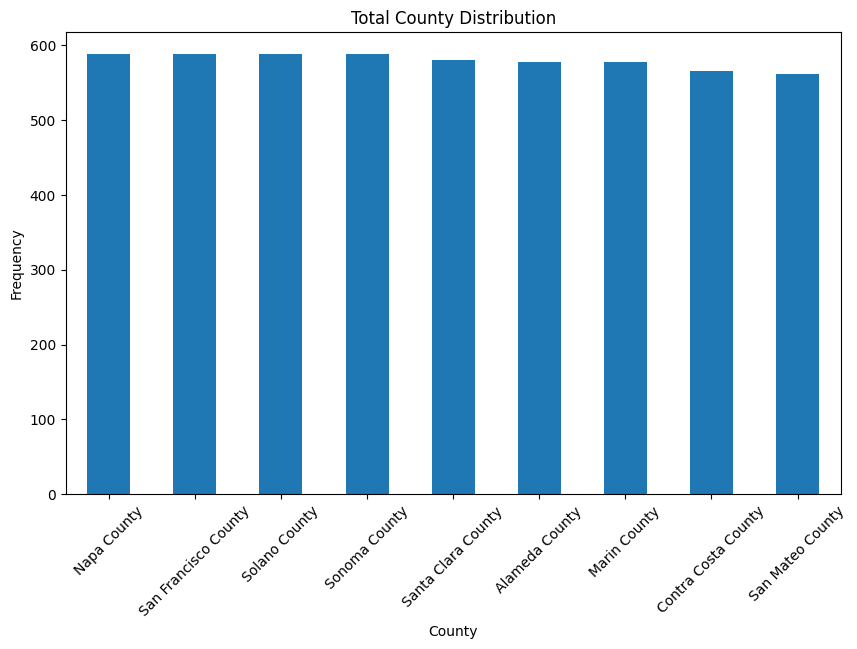

In [ ]:
#now plot again
count_county=pd.value_counts(y_res,sort=True)

# Plot the total volume for each name
plt.figure(figsize=(10, 6))
count_county.plot(kind='bar', rot=45)
plt.title("Total County Distribution")
plt.xlabel("County")
plt.ylabel("Frequency")
plt.show()

In [ ]:
count_county=pd.value_counts(y_res,sort=True)
count_county

Napa County             588
San Francisco County    588
Solano County           588
Sonoma County           588
Santa Clara County      581
Alameda County          578
Marin County            578
Contra Costa County     566
San Mateo County        561
Name: County, dtype: int64

In [ ]:
# Convert csr_matrix to DataFrame
x_res_df = pd.DataFrame(x_res.toarray())

# Save resampled data to CSV files
x_res_df.to_csv("x_resampled.csv", index=False)
pd.DataFrame(y_res).to_csv("y_resampled.csv", index=False)


In [ ]:
x_res

<5216x2099 sparse matrix of type '<class 'numpy.float64'>'
	with 39950 stored elements in Compressed Sparse Row format>

In [ ]:
y_res

0       Alameda County
1       Alameda County
2       Alameda County
3       Alameda County
4       Alameda County
             ...      
5211     Sonoma County
5212     Sonoma County
5213     Sonoma County
5214     Sonoma County
5215     Sonoma County
Name: County, Length: 5216, dtype: object